In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from emd import sift

plt.rcParams['text.usetex'] = True

Shape of IMFs: (2000, 3)


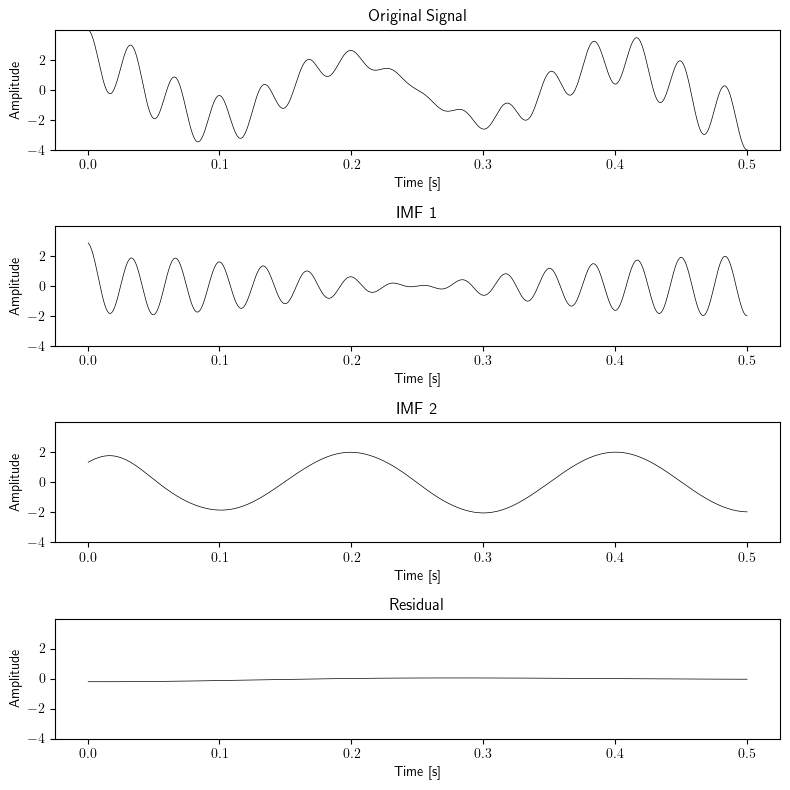

In [3]:

# Define the time vector
t = np.linspace(1, 1000, 2000) / 2000

# Compute the signal components
y1 = np.cos(62 * np.pi * t)
y2 = np.cos(58 * np.pi * t)
y3 = 2 * np.cos(10 * np.pi * t)
y = y1 + y2 + y3

# Perform Empirical Mode Decomposition (EMD)
imfs = sift.sift(y)

# Check the shape of the IMFs
print(f"Shape of IMFs: {imfs.shape}")  # It should be (len(t), number_of_imfs)

# Determine the y-axis limits for consistent scaling
y_min = min(y.min(), imfs.min())
y_max = max(y.max(), imfs.max())

# Plot the original signal and the IMFs
fig, axs = plt.subplots(4, 1, figsize=(8, 8), tight_layout=True)

# Plot the original signal
axs[0].plot(t, y, color='black', linewidth=0.5)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim(y_min, y_max)

# Plot each IMF and label the last one as residual
for i in range(3):  # Only the first 3 IMFs
    axs[i + 1].plot(t, imfs[:, i], color='black', linewidth=0.5)
    if i == 2:
        axs[i + 1].set_title('Residual')
    else:
        axs[i + 1].set_title(f'IMF {i + 1}')
    axs[i + 1].set_xlabel('Time [s]')
    axs[i + 1].set_ylabel('Amplitude')
    axs[i + 1].set_ylim(y_min, y_max)

plt.tight_layout()